In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print(f"matplotlib: mpl {plt.matplotlib.__version__}")
print('sklearn version:', sklearn.__version__)

font_path = "c:/Windows/Fonts/malgun.ttf"
font_prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

numpy version: 2.1.0
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib: mpl 3.9.2
sklearn version: 1.5.1


In [2]:
data = pd.read_csv('accident.csv')

In [3]:
data.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2014010100100005,2014년 1월 1일 00시,수요일,서울특별시 구로구 오류동,부상신고사고,0,0,0,2,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,31세,상해없음,승용,남,65세,부상신고
1,2014010100100029,2014년 1월 1일 01시,수요일,서울특별시 성동구 마장동,중상사고,0,1,3,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,32세,상해없음,승용,남,54세,중상
2,2014010100100050,2014년 1월 1일 02시,수요일,서울특별시 광진구 광장동,중상사고,0,1,0,4,차대차 - 추돌 - 진행중,...,맑음,단일로 - 기타,승용,남,26세,상해없음,승용,여,26세,부상신고
3,2014010100100053,2014년 1월 1일 02시,수요일,서울특별시 구로구 개봉동,경상사고,0,0,2,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,29세,상해없음,승용,남,25세,경상
4,2014010100100054,2014년 1월 1일 02시,수요일,서울특별시 양천구 목동,경상사고,0,0,2,0,차대차 - 측면직각충돌,...,맑음,교차로 - 교차로안,승용,여,42세,상해없음,승용,남,37세,경상


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26270 entries, 0 to 26269
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        26270 non-null  int64 
 1   사고일시        26270 non-null  object
 2   요일          26270 non-null  object
 3   시군구         26270 non-null  object
 4   사고내용        26270 non-null  object
 5   사망자수        26270 non-null  int64 
 6   중상자수        26270 non-null  int64 
 7   경상자수        26270 non-null  int64 
 8   부상신고자수      26270 non-null  int64 
 9   사고유형        26270 non-null  object
 10  법규위반        26270 non-null  object
 11  노면상태        26270 non-null  object
 12  기상상태        26270 non-null  object
 13  도로형태        26270 non-null  object
 14  가해운전자 차종    26270 non-null  object
 15  가해운전자 성별    26270 non-null  object
 16  가해운전자 연령    26270 non-null  object
 17  가해운전자 상해정도  26270 non-null  object
 18  피해운전자 차종    24900 non-null  object
 19  피해운전자 성별    24900 non-null  object
 20  피해운전자 

In [5]:
data['사고일시'].head()

0    2014년 1월 1일 00시
1    2014년 1월 1일 01시
2    2014년 1월 1일 02시
3    2014년 1월 1일 02시
4    2014년 1월 1일 02시
Name: 사고일시, dtype: object

In [9]:
date_format = '%Y년 %m월 %d일 %H시'

# 문자열을 날짜로 변환
data['사고일시'] = pd.to_datetime(data['사고일시'], format=date_format)

In [10]:
data['사고일시_날짜'] = data['사고일시'].dt.date
data['사고일시_시간'] = data['사고일시'].dt.time

In [11]:
data.drop(columns= ['사고일시'])

,사고번호,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,...,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사고일시_날짜,사고일시_시간
0,2014010100100005,수요일,서울특별시 구로구 오류동,부상신고사고,0,0,0,2,차대차 - 기타,안전운전불이행,...,승용,남,31세,상해없음,승용,남,65세,부상신고,2014-01-01,00:00:00
1,2014010100100029,수요일,서울특별시 성동구 마장동,중상사고,0,1,3,0,차대차 - 기타,안전운전불이행,...,승용,남,32세,상해없음,승용,남,54세,중상,2014-01-01,01:00:00
2,2014010100100050,수요일,서울특별시 광진구 광장동,중상사고,0,1,0,4,차대차 - 추돌 - 진행중,안전운전불이행,...,승용,남,26세,상해없음,승용,여,26세,부상신고,2014-01-01,02:00:00
3,2014010100100053,수요일,서울특별시 구로구 개봉동,경상사고,0,0,2,0,차대차 - 기타,안전운전불이행,...,승용,남,29세,상해없음,승용,남,25세,경상,2014-01-01,02:00:00
4,2014010100100054,수요일,서울특별시 양천구 목동,경상사고,0,0,2,0,차대차 - 측면직각충돌,기타,...,승용,여,42세,상해없음,승용,남,37세,경상,2014-01-01,02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26265,2023123000100050,토요일,서울특별시 은평구 응암동,경상사고,0,0,1,0,차대사람 - 차도통행중,안전운전불이행,...,승용,남,31세,상해없음,보행자,여,81세 이상,경상,2023-12-30,05:00:00
26266,2023123000100220,토요일,서울특별시 동대문구 휘경동,경상사고,0,0,1,0,차대차 - 정면충돌,중앙선침범,...,승용,남,63세,상해없음,화물,남,60세,경상,2023-12-30,13:00:00
26267,2023123000100222,토요일,서울특별시 송파구 잠실동,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,...,승용,남,27세,상해없음,승용,남,59세,경상,2023-12-30,13:00:00
26268,2023123100100170,일요일,서울특별시 은평구 불광동,경상사고,0,0,4,0,차대차 - 추돌,안전운전불이행,...,승용,남,48세,상해없음,승용,남,37세,경상,2023-12-31,15:00:00


## 요일별, 시간대별, 월별, 연도별 사건수

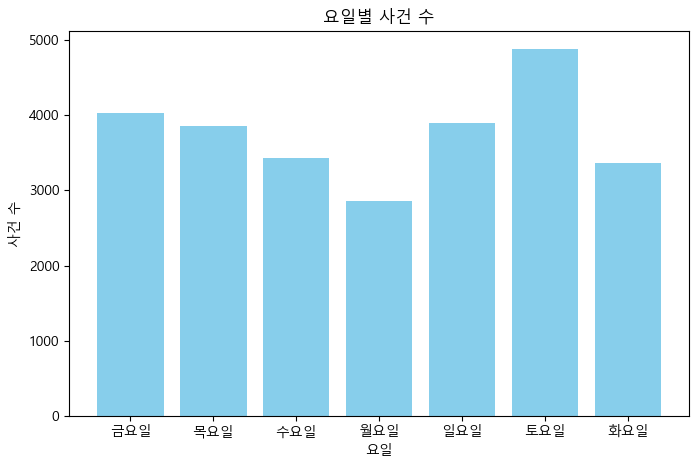

In [12]:
# 요일별 사건수
요일별_사건수 = data['요일'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(요일별_사건수.index, 요일별_사건수.values, color='skyblue')
plt.title('요일별 사건 수')
plt.xlabel('요일')
plt.ylabel('사건 수')
plt.show()

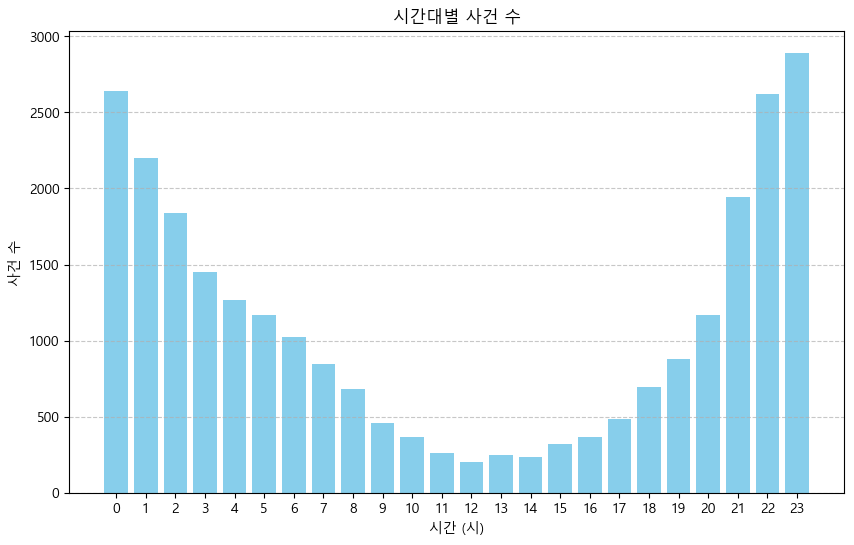

In [13]:
#시간대별 사건 수
data['시간'] = pd.to_datetime(data['사고일시_시간'], format='%H:%M:%S').dt.hour

시간별_사건수 = data['시간'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(시간별_사건수.index, 시간별_사건수.values, color='skyblue')
plt.title('시간대별 사건 수')
plt.xlabel('시간 (시)')
plt.ylabel('사건 수')
plt.xticks(range(0, 24))  # 0시부터 23시까지 시간 단위를 설정
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

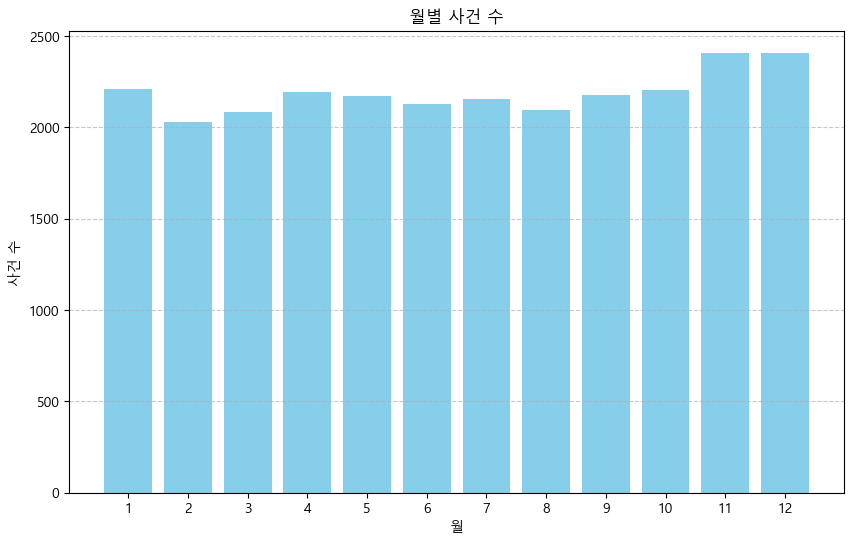

In [14]:
#월별 사건 수 
data['사고일시_날짜'] = pd.to_datetime(data['사고일시_날짜'])

data['월'] = data['사고일시_날짜'].dt.month

월별_사건수 = data['월'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(월별_사건수.index, 월별_사건수.values, color='skyblue')
plt.title('월별 사건 수')
plt.xlabel('월')
plt.ylabel('사건 수')
plt.xticks(range(1, 13))  # 1월부터 12월까지
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

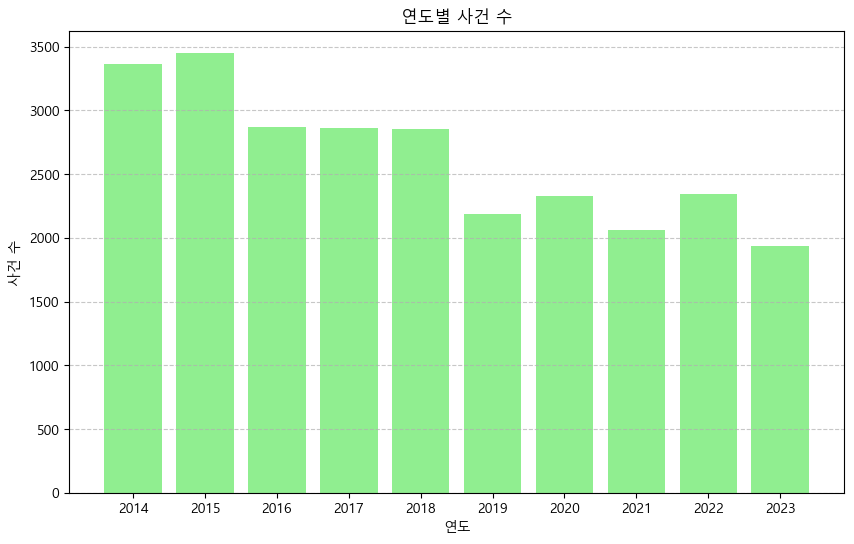

In [15]:
# 연도별 사건 수
data['연도'] = data['사고일시_날짜'].dt.year

연도별_사건수 = data['연도'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(연도별_사건수.index, 연도별_사건수.values, color='lightgreen')
plt.title('연도별 사건 수')
plt.xlabel('연도')
plt.ylabel('사건 수')
plt.xticks(연도별_사건수.index)  # 연도를 표시
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

## 성별에 따른 상해정도

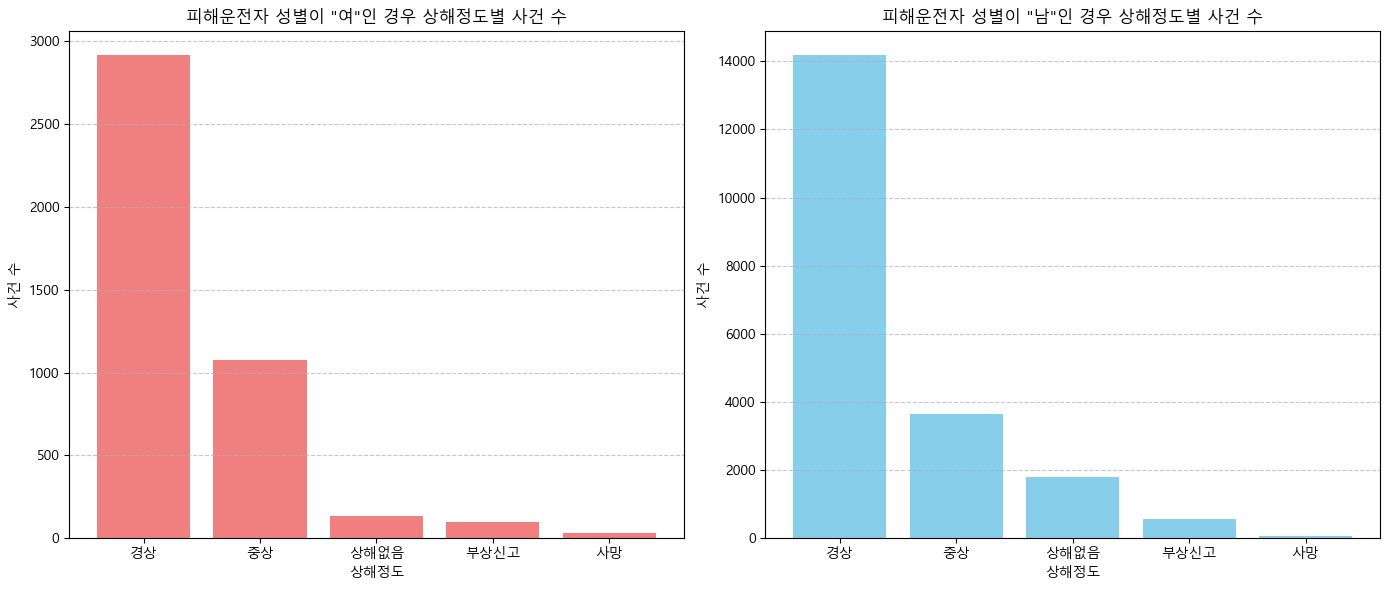

In [16]:
# 피해자가 '여자'일 때의 상해정도
여성_피해자 = data[data['피해운전자 성별'] == '여']
상해정도_별_사건수_여성 = 여성_피해자['피해운전자 상해정도'].value_counts()

# 피해자가 '남자'일 때의 상해정도
남자_피해자 = data[data['피해운전자 성별'] == '남']
상해정도_별_사건수_남자 = 남자_피해자['피해운전자 상해정도'].value_counts()

plt.figure(figsize=(14, 6))

상해정도_별_사건수_여성 = 상해정도_별_사건수_여성.drop('기타불명', errors='ignore')
상해정도_별_사건수_남자 = 상해정도_별_사건수_남자.drop('기타불명', errors='ignore')

# 첫 번째 그래프: 피해운전자 성별이 '여'인 경우
plt.subplot(1, 2, 1)
plt.bar(상해정도_별_사건수_여성.index, 상해정도_별_사건수_여성.values, color='lightcoral')
plt.title('피해운전자 성별이 "여"인 경우 상해정도별 사건 수')
plt.xlabel('상해정도')
plt.ylabel('사건 수')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 두 번째 그래프: 피해운전자 성별이 '남'인 경우
plt.subplot(1, 2, 2)
plt.bar(상해정도_별_사건수_남자.index, 상해정도_별_사건수_남자.values, color='skyblue')
plt.title('피해운전자 성별이 "남"인 경우 상해정도별 사건 수')
plt.xlabel('상해정도')
plt.ylabel('사건 수')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

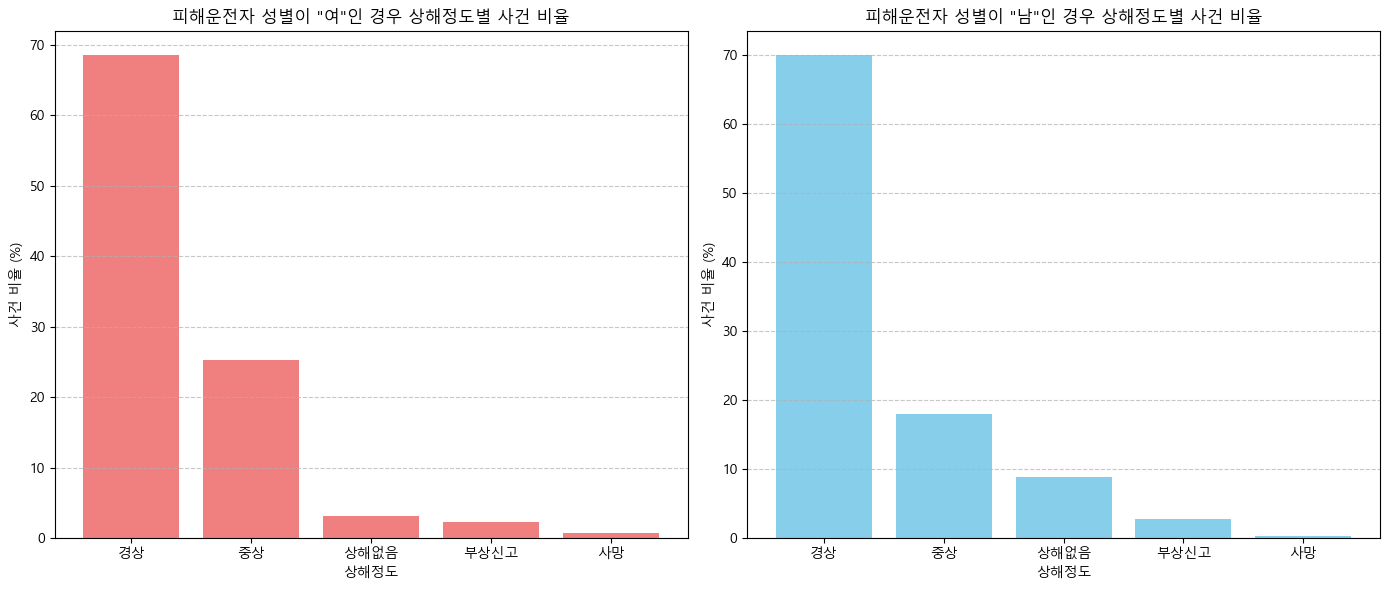

In [17]:
#정규화를 위해 비율로
import matplotlib.pyplot as plt

# 피해자가 '여자'일 때의 상해정도
여성_피해자 = data[data['피해운전자 성별'] == '여']
상해정도_별_사건수_여성 = 여성_피해자['피해운전자 상해정도'].value_counts()

# 피해자가 '남자'일 때의 상해정도
남자_피해자 = data[data['피해운전자 성별'] == '남']
상해정도_별_사건수_남자 = 남자_피해자['피해운전자 상해정도'].value_counts()

# '기타불명' 제외
상해정도_별_사건수_여성 = 상해정도_별_사건수_여성.drop('기타불명', errors='ignore')
상해정도_별_사건수_남자 = 상해정도_별_사건수_남자.drop('기타불명', errors='ignore')

# 전체 사건 수
total_여성 = 상해정도_별_사건수_여성.sum()
total_남자 = 상해정도_별_사건수_남자.sum()

# 비율로 변환 (백분율)
비율_여성 = (상해정도_별_사건수_여성 / total_여성) * 100
비율_남자 = (상해정도_별_사건수_남자 / total_남자) * 100


plt.figure(figsize=(14, 6))

# 첫 번째 그래프: 피해운전자 성별이 '여'인 경우
plt.subplot(1, 2, 1)
plt.bar(비율_여성.index, 비율_여성.values, color='lightcoral')
plt.title('피해운전자 성별이 "여"인 경우 상해정도별 사건 비율')
plt.xlabel('상해정도')
plt.ylabel('사건 비율 (%)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# 두 번째 그래프: 피해운전자 성별이 '남'인 경우
plt.subplot(1, 2, 2)
plt.bar(비율_남자.index, 비율_남자.values, color='skyblue')
plt.title('피해운전자 성별이 "남"인 경우 상해정도별 사건 비율')
plt.xlabel('상해정도')
plt.ylabel('사건 비율 (%)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


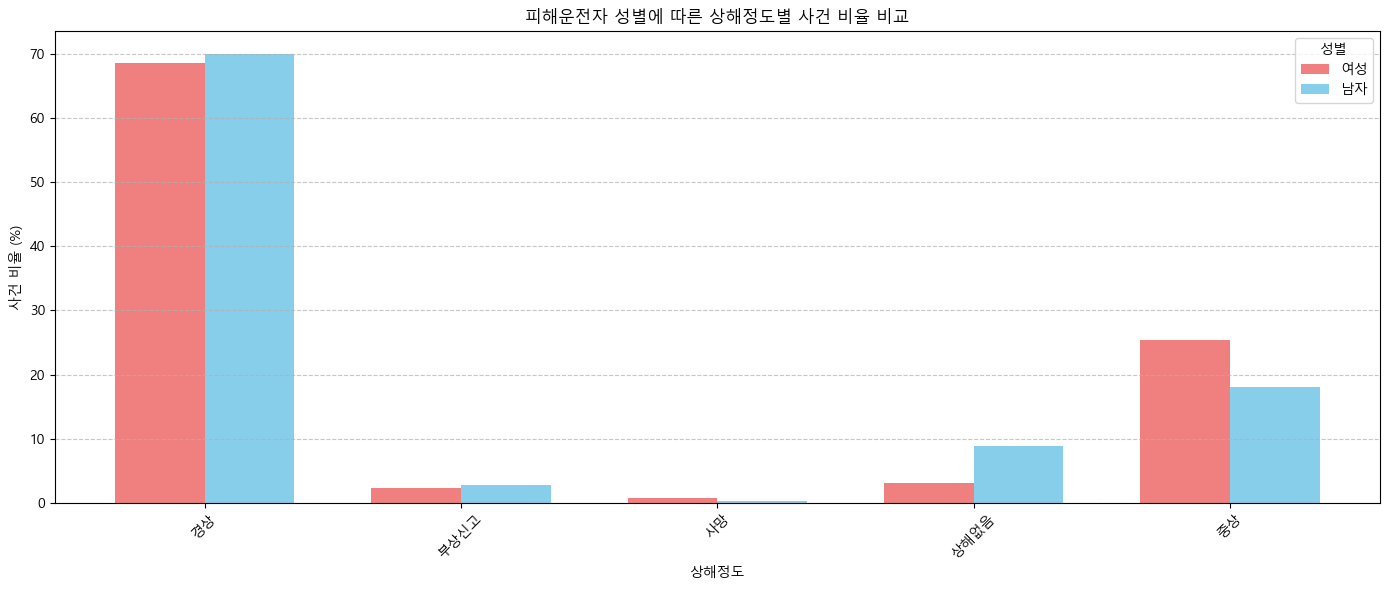

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 피해자가 '여자'일 때의 상해정도
여성_피해자 = data[data['피해운전자 성별'] == '여']
상해정도_별_사건수_여성 = 여성_피해자['피해운전자 상해정도'].value_counts()

# 피해자가 '남자'일 때의 상해정도
남자_피해자 = data[data['피해운전자 성별'] == '남']
상해정도_별_사건수_남자 = 남자_피해자['피해운전자 상해정도'].value_counts()

# '기타불명' 제외
상해정도_별_사건수_여성 = 상해정도_별_사건수_여성.drop('기타불명', errors='ignore')
상해정도_별_사건수_남자 = 상해정도_별_사건수_남자.drop('기타불명', errors='ignore')

# 전체 사건 수
total_여성 = 상해정도_별_사건수_여성.sum()
total_남자 = 상해정도_별_사건수_남자.sum()

# 비율로 변환 (백분율)
비율_여성 = (상해정도_별_사건수_여성 / total_여성) * 100
비율_남자 = (상해정도_별_사건수_남자 / total_남자) * 100

# 상해 정도 카테고리 정렬
categories = sorted(set(비율_여성.index).union(set(비율_남자.index)))

# 비율_여성과 비율_남자에 카테고리 추가
비율_여성 = 비율_여성.reindex(categories, fill_value=0)
비율_남자 = 비율_남자.reindex(categories, fill_value=0)

x = np.arange(len(categories))  # X 위치
width = 0.35  # 막대 너비

plt.figure(figsize=(14, 6))

# 이중 막대그래프 그리기
plt.bar(x - width/2, 비율_여성, width, label='여성', color='lightcoral')
plt.bar(x + width/2, 비율_남자, width, label='남자', color='skyblue')

# 그래프 설정
plt.xlabel('상해정도')
plt.ylabel('사건 비율 (%)')
plt.title('피해운전자 성별에 따른 상해정도별 사건 비율 비교')
plt.xticks(x, categories, rotation=45)  # X축 레이블 설정
plt.legend(title='성별')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
